# DBSCAN Clustering

In [14]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [15]:
# importing the pulsar star dataset with pandas
dataset = pd.read_csv('pulsar_stars.csv')

In [16]:
X = dataset.drop(['target_class'], axis=1)

X.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [17]:
y = dataset['target_class']

In [ ]:
X = np.array(X)

X

In [20]:
# transform the data to be stretched based on the random state - change the random state to change the shape
y = np.array(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

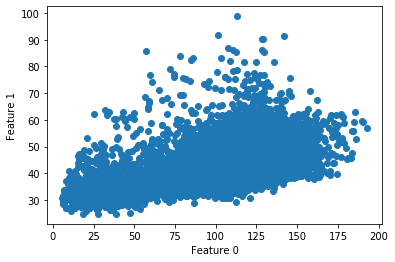

In [21]:
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Running K-Means

Text(0, 0.5, ' Skewness of the DM-SNR curve')

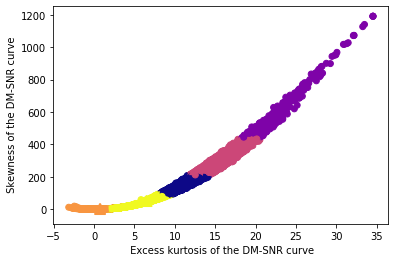

In [22]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 6], X[:, 7], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 6],   
            kmeans.cluster_centers_[:, 7],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel(" Excess kurtosis of the DM-SNR curve")
plt.ylabel(" Skewness of the DM-SNR curve")

## Running DBSCAN

In [23]:
X

array([[140.5625    ,  55.68378214,  -0.23457141, ...,  19.11042633,
          7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815, ...,  14.86014572,
         10.57648674, 127.3935796 ],
       [103.015625  ,  39.34164944,   0.32332837, ...,  21.74466875,
          7.73582202,  63.17190911],
       ...,
       [119.3359375 ,  59.93593941,   0.1593631 , ...,  58.8720002 ,
          2.49951714,   4.59517265],
       [114.5078125 ,  53.90239966,   0.20116138, ...,  13.38173065,
         10.00796731, 134.2389095 ],
       [ 57.0625    ,  85.79734025,   1.40639105, ...,  64.71256228,
         -1.59752658,   1.42947536]])

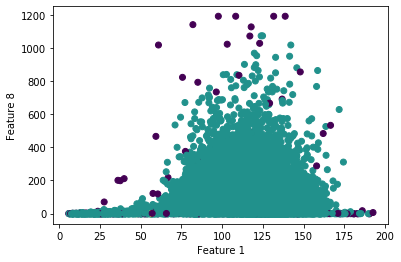

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# cluster the data
dbscan = DBSCAN(eps=1, min_samples = 5)#increase min sample
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 7], c=clusters,)
plt.xlabel("Feature 1")
plt.ylabel("Feature 8")

plt.show()

In [27]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 2
Number of noise sample = 169


In [28]:
from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, clusters))
print("Completeness: %0.3f" % metrics.completeness_score(y, clusters))
print("V-measure: %0.3f" % metrics.v_measure_score(y, clusters))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, clusters))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, clusters))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, clusters))

Estimated number of clusters: 2
Estimated number of noise points: 169
Homogeneity: 0.007
Completeness: 0.040
V-measure: 0.012
Adjusted Rand Index: 0.041
Adjusted Mutual Information: 0.007


C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Coefficient: 0.414
